In [1]:
# Import necessary packages
import os
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Data Load & Pre-processing

In [2]:
# input folder
data_root = os.path.join(os.getcwd(),'input')

In [3]:
from data_preprocessing import *

In [4]:
df = load_data_from_local(data_root)
df.head(5)

Meta data size: 9022
c:\Users\pywong\Desktop\PolyU\COMP5434 Big Data Computing\Assignment\COMP5434-Big-Data-Computing\input\subset\subset\document_parses\pdf_json
total json files: 12000


100%|██████████| 8083/8083 [00:34<00:00, 231.55it/s]


,doc_num,paper_id,publish_time,doi,abstract,body_text,authors,title,journal,abstract_summary,language,processed_title,processed_abstract,processed_text,processed_title_list,processed_abstract_list,processed_text_list,all_text_list
0,0,0015cecc2298c3bdb9bda0e0b84b38ebdcca716f,2022-02-02,10.1007/s40744-022-00425-0,Coronavirus disease 2019 caused by the severe ...,Systemic inflammation is the hallmark of coron...,"Drosos, Alexandros A.. Pelechas, Eleftherios...",Colchicine Against SARS-CoV-2 Infection: What ...,Rheumatol Ther,Coronavirus disease 2019 caused by the severe ...,en,,coronavirus disease caused severe acute respir...,systemic inflammation hallmark coronavirus dis...,[],"[coronavirus, disease, caused, severe, acute, ...","[systemic, inflammation, hallmark, coronavirus...","[coronavirus, disease, caused, severe, acute, ..."
1,1,0016a5c32e9cea6002cf6f352ecdb5231c7e3194,2020-07-16,10.30699/ijp.2020.127312.2387,,Severe acute respiratory syndrome coronavirus ...,"Abdollahi, Alireza. shakoori, Abbas...",Comparison of Patient-collected and Lab Techni...,Iran J Pathol,Severe acute respiratory syndrome coronavirus ...,en,collected collected,,severe acute respiratory syndrome coronavirus ...,"[collected, collected]",[],"[severe, acute, respiratory, syndrome, coronav...","[collected, collected, severe, acute, respirat..."
2,2,0020e5c796f50e927b96ff0b7ea375b4745261a3,2020-05-08,10.1186/s12887-020-02112-x,Background: One major limitation for less inva...,Respiratory Distress Syndrome (RDS) affects 85...,"Chevallier, Marie. Durrmeyer, Xavier...",Propofol versus placebo (with rescue with keta...,BMC Pediatr,Background: One major limitation for less inva...,en,versus placebo rescue ketamine invasive surfac...,background major limitation invasive surfactan...,respiratory distress syndrome affects preterm ...,"[versus, placebo, rescue, ketamine, invasive, ...","[background, major, limitation, invasive, surf...","[respiratory, distress, syndrome, affects, pre...","[versus, placebo, rescue, ketamine, invasive, ..."
3,3,00234390dbc45e3370ac8f80cbd93cec3777ca92,2021-03-26,10.1016/j.ajur.2021.03.006,Objective: To identify the impact of COVID-19 ...,The World Health Organization (WHO) has announ...,"Raheem Ali, Abdel. Ghazwani, Yahya...",Impact of COVID-19 on endourology surgical pra...,Asian J Urol,Objective: To identify the impact of COVID-19 ...,en,endourology surgical practice national multice...,objective identify impact endourology surgical...,world health organization announced novel coro...,"[endourology, surgical, practice, national, mu...","[objective, identify, impact, endourology, sur...","[world, health, organization, announced, novel...","[endourology, surgical, practice, national, mu..."
4,4,0025fd87cfaf7953079b618771218b8de6893928,2021-09-06,10.3389/fcell.2021.748905,,"The concept of specialized ""membrane microdoma...","Garofalo, Tina. Misasi, Roberta...",Editorial: Targeting Lipid Rafts as a Strategy...,Front Cell Dev Biol,"The concept of specialized ""membrane microdoma...",en,,,concept specialized membrane microdomains refe...,[],[],"[concept, specialized, membrane, microdomains,...","[concept, specialized, membrane, microdomains,..."


# Histogram of year / journal

In [5]:
df['publish_year'] = df['publish_time'].dt.year
start_year = 1970
end_year = 2022

mask = (df['publish_year'] >= start_year) & (df['publish_year'] <= end_year)

df = df.loc[mask]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8041 entries, 0 to 8040
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   doc_num                  8041 non-null   int64         
 1   paper_id                 8041 non-null   object        
 2   publish_time             8041 non-null   datetime64[ns]
 3   doi                      8041 non-null   object        
 4   abstract                 8041 non-null   object        
 5   body_text                8041 non-null   object        
 6   authors                  8041 non-null   object        
 7   title                    8041 non-null   object        
 8   journal                  8041 non-null   object        
 9   abstract_summary         8041 non-null   object        
 10  language                 8041 non-null   object        
 11  processed_title          8041 non-null   object        
 12  processed_abstract       8041 non-null 

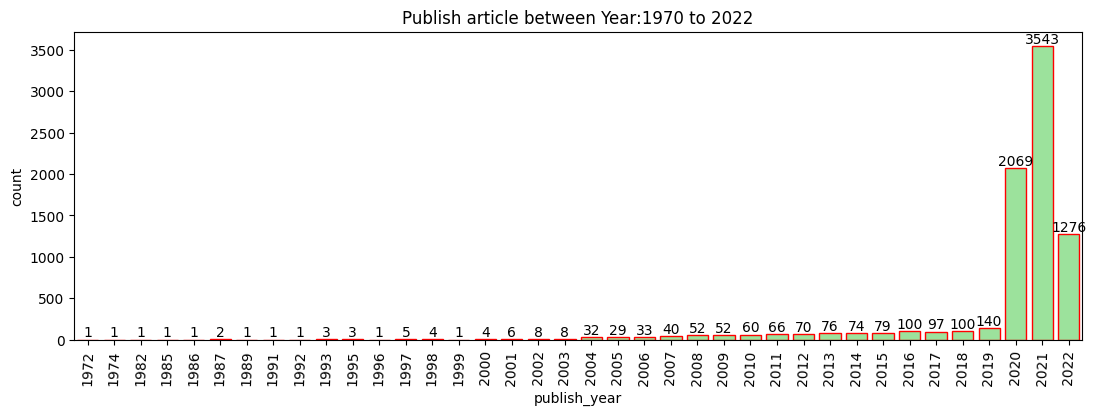

In [6]:
plt.figure(figsize=(13,4))
ax = sns.countplot(x='publish_year', data=df, color='lightgreen', edgecolor='red',)
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', rotation=88)
plt.title('Publish article between Year:' + str(start_year) + ' to ' + str(end_year))
plt.show()

# Histogram of Journal

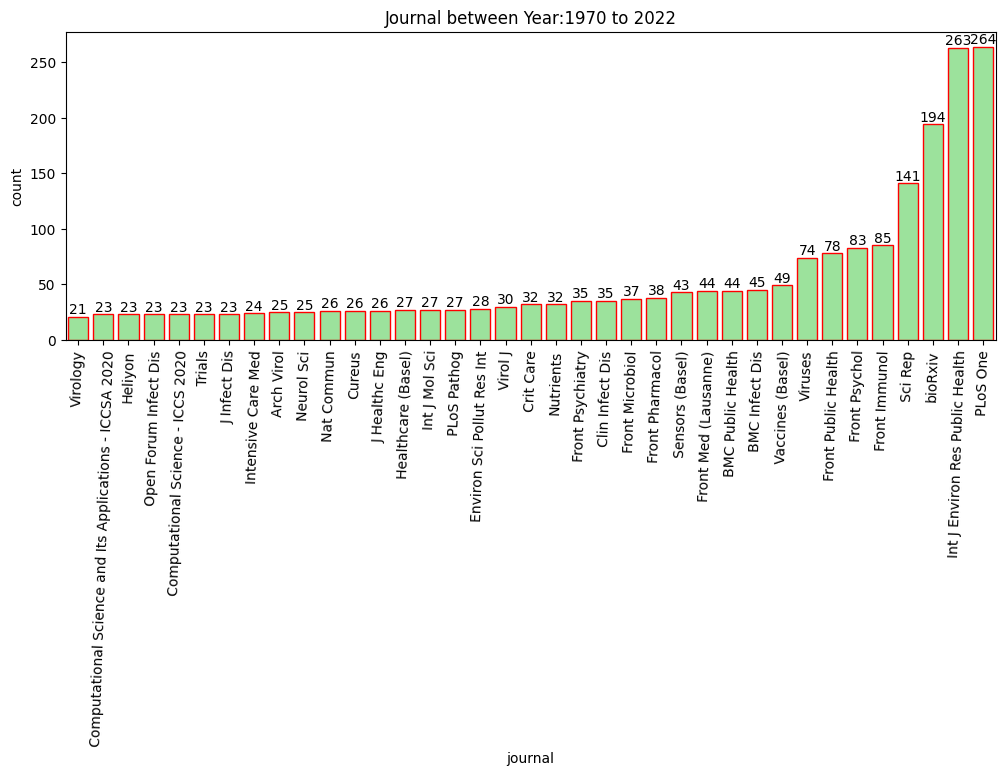

In [7]:
a = df.groupby('journal').filter(lambda x: len(x) > 20)
order = a.journal.value_counts(ascending=True).index

plt.figure(figsize=(12,4))
bx = sns.countplot(data=a, color='lightgreen', edgecolor='red', order=order, x='journal') 
bx.bar_label(bx.containers[0])
bx.tick_params(axis='x', rotation=88)
plt.title('Journal between Year:' + str(start_year) + ' to ' + str(end_year))
plt.show()

# Map-Reduce 

In [8]:
from map_reduce import *

In [9]:
metadata_path = os.path.join(data_root, 'meta_10k.csv')

num_top_filtered = 50
num_top_unfilter = 80

In [10]:
documents_MR = load_documents_mr(metadata_path)

sorted_words, sorted_words_unfilter = map_reduce(documents_MR)

# Get the top 50 prevalent words
top_filtered = sorted_words[:num_top_filtered]
top_unfilter = sorted_words_unfilter[:num_top_unfilter]

# Step 6.1: Print the table of the top 50 prevalent words without stop words list
#print("Top 80 Prevalent Words without stopwords:")
#print(f"{'ID':<4}{'Word':<20}{'Count'}")
#print("-----------------------------")
#for idx, (word, count) in enumerate(top50_unfilter, start=1):
#    print(f"{idx:<4}{word:<20}{count}")
#print("\n"+"\n")

# Step 6.2: Print the table of the top 50 prevalent words with IDs
print("Top 50 Prevalent Words:")
print(f"{'ID':<4}{'Word':<20}{'Count'}")
print("-----------------------------")
for idx, (word, count) in enumerate(top_filtered, start=1):
    print(f"{idx:<4}{word:<20}{count}")


Top 50 Prevalent Words:
ID  Word                Count
-----------------------------
1   covid-19            10343
2   patients            7203
3   study               5251
4   health              4244
5   data                3600
6   disease             3458
7   =                   3426
8   sars-cov-2          3371
9   not                 3184
10  clinical            2962
11  pandemic            2923
12  more                2844
13  infection           2803
14  respiratory         2490
15  results             2486
16  associated          2484
17  coronavirus         2449
18  risk                2438
19  virus               2395
20  analysis            2342
21  all                 2340
22  than                2267
23  most                2246
24  viral               2192
25  other               2187
26  such                2182
27  model               2127
28  severe              2101
29  two                 2019
30  results:            1971
31  care                1970
32  different   

# Similarity Analysis

In [11]:
from similarity_analysis import *

In [12]:
# pick a target document to compare
target_doc_num = 0

# input feature size (number of token used)
feature_size = 2**12

random.seed(10)

Define characteristic matrix by tokenizing the processed text

In [13]:
# Label the document is the target or not
df['doc_type'] = 'other documents'
df.at[target_doc_num,'doc_type'] = 'target document'

In [14]:
# Build feature with token count
count_vectorizer = CountVectorizer(max_features=feature_size)
X_count = count_vectorizer.fit_transform(df['processed_text'].values).toarray().T

# Clip count between 0 and 1 to only consider the token exists in document or not
X_clip = np.clip(X_count, 0, 1)

# Use TF-IDF as feature to only consider interseting words
tfidf_vectorizer = TfidfVectorizer(max_features=feature_size)
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text'].values).toarray().T

In [15]:
count_result = check_document_similarity(X_count,df,target_doc_num)
clip_result = check_document_similarity(X_clip,df,target_doc_num)
tfidf_result = check_document_similarity(X_tfidf,df,target_doc_num)

## MinHash

Using token occurrence as document feature. Create a signature matrix using MinHash.
Compare the signature Jaccard similarity with the document L1 Norm (Hamming distance).

In [16]:
# Input to test the minhash performance
num_perm_list = list(range(50,200+1,50))

In [17]:
permutation_dict = minhash_with_different_permutation(df,X_clip,clip_result,target_doc_num,num_perm_list)
minhash_fine_turn_result = compare_minhash_fine_tune(permutation_dict)
minhash_fine_turn_result

ValueError: min() iterable argument is empty

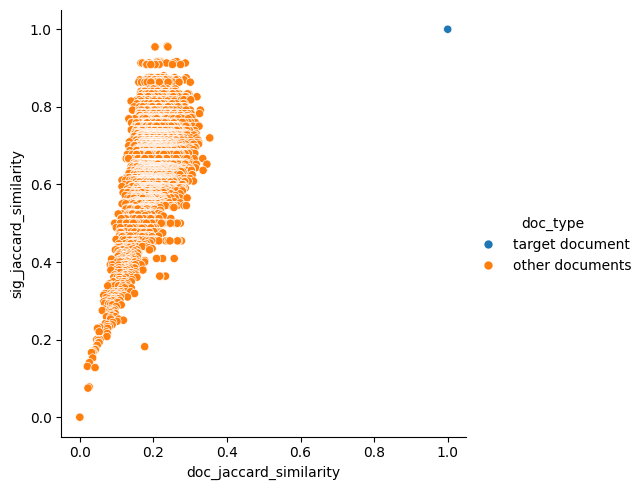

In [ ]:
optimal_perm_num = int(minhash_fine_turn_result.sort_values(by=['correlation'],ascending=False).head(1)['num_perm'].values)
minhash_result = permutation_dict[optimal_perm_num]
# minhash_result.plot(x='sig_jaccard_similarity', y='doc_jaccard_similarity', style='o')
sns.relplot(data=minhash_result,x='doc_jaccard_similarity', y='sig_jaccard_similarity', hue='doc_type')

In [ ]:
minhash_result[['doc_num','sig_jaccard_similarity','abstract_summary','doc_type']].head(10)

,doc_num,sig_jaccard_similarity,abstract_summary,doc_type
0,0,1.000000,Coronavirus disease 2019 caused by the severe ...,target document
3675,3675,0.956522,Microvascular dysfunction plays a fundamental ...,other documents
388,388,0.954545,Conclusion: An evidence-based sustainable and ...,other documents
4752,4752,0.954545,SARS-CoV-2 (CoV) is the etiological agent of t...,other documents
7173,7173,0.954545,Infectious diseases pose major socioeconomic a...,other documents
3230,3230,0.916667,BACKGROUND: The prospective DIabetes and CATar...,other documents
5189,5189,0.916667,Stem cells from human exfoliated deciduous tee...,other documents
5925,5925,0.916667,The photocatalytic properties of titanium diox...,other documents
6996,6996,0.916667,Background: The mortality rate from acute resp...,other documents
7818,7818,0.913043,Insulin represents a mainstay of glucose-lower...,other documents


## SimHash

Using TF-IDF as document feature. Create a signature matrix using SimHash.
Compare the signature Hamming distance with the document cosine similarity.

In [ ]:
tfidf_feature_list = list(tfidf_vectorizer.get_feature_names_out())

feature_hash_md5 = get_feature_hash(tfidf_feature_list,'md5')
finger_print_list_md5 = get_finger_print_list(X_tfidf,feature_hash_md5)

feature_hash_sha1 = get_feature_hash(tfidf_feature_list,'sha1')
finger_print_list_sha1 = get_finger_print_list(X_tfidf,feature_hash_sha1)

In [ ]:
# Check Performance
tfidf_result = check_document_similarity(X_tfidf,df,target_doc_num)

md5 = check_simhash_similarity(finger_print_list_md5,target_doc_num)
md5 = tfidf_result.merge(md5,how='outer',on='doc_num')
md5 = md5.sort_values(by=['sig_hamming_distance'],ascending=True)

sha1 = check_simhash_similarity(finger_print_list_sha1,target_doc_num)
sha1 = tfidf_result.merge(sha1,how='outer',on='doc_num')
sha1 = sha1.sort_values(by=['sig_hamming_distance'],ascending=True)

if pearsonr(md5['doc_cosine_similarity'],md5['sig_hamming_distance']).statistic < pearsonr(sha1['doc_cosine_similarity'],sha1['sig_hamming_distance']).statistic:
    simhash_result = md5
else:
    simhash_result = sha1

PearsonRResult(statistic=-0.7730891301719717, pvalue=0.0)


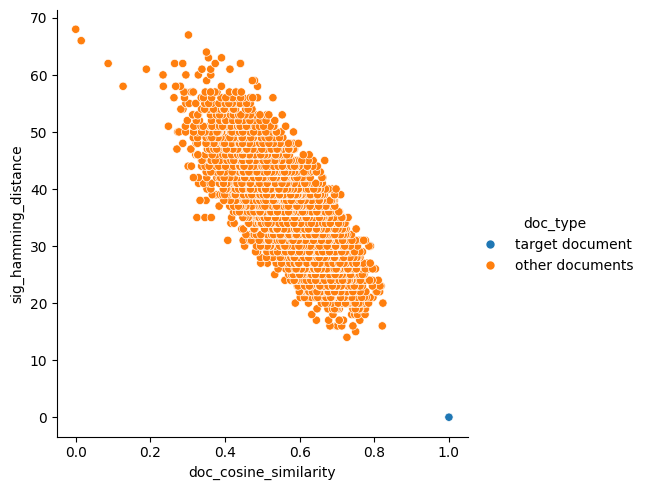

In [ ]:
print(pearsonr(md5['doc_cosine_similarity'],md5['sig_hamming_distance']))
# md5.plot(x='doc_cosine_similarity', y='sig_hamming_distance', style='o')
sns.relplot(data=md5,x='doc_cosine_similarity', y='sig_hamming_distance', hue='doc_type')

PearsonRResult(statistic=-0.7889262932924689, pvalue=0.0)


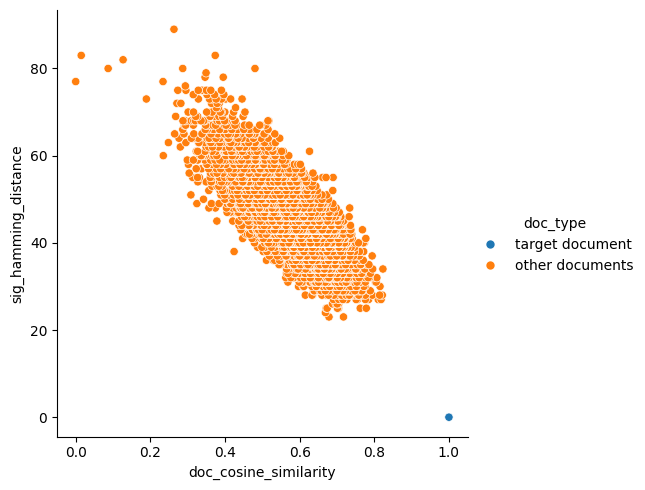

In [ ]:
print(pearsonr(sha1['doc_cosine_similarity'],sha1['sig_hamming_distance']))
# sha1.plot(x='doc_cosine_similarity', y='sig_hamming_distance', style='o')
sns.relplot(data=sha1,x='doc_cosine_similarity', y='sig_hamming_distance', hue='doc_type')

In [ ]:
simhash_result[['doc_num','sig_hamming_distance','abstract_summary','doc_type']].head(10)

,doc_num,sig_hamming_distance,abstract_summary,doc_type
0,0,0,Coronavirus disease 2019 caused by the severe ...,target document
4797,4797,23,Although mobility shapes the material landscap...,other documents
7155,7155,23,Background. Traditional Chinese medicine Yinhu...,other documents
4220,4220,24,"solutions emerge (Hong and Page, 2004; Valenti...",other documents
4538,4538,25,"Public health events, as the common concern fa...",other documents
4208,4208,25,Sepsis and COVID-19 are two clinical condition...,other documents
7669,7669,25,Background: To evaluate and determine the prot...,other documents
2158,2158,25,Debates about emerging infectious diseases oft...,other documents
7543,7543,25,The first case records of COVID-19 in the worl...,other documents
5420,5420,25,In the context of sports-based interventions f...,other documents


## Doc2Vec

Word2Vec also need to consider token position for word embeding. Use the original text instead of the processed text for vectorization.

In [ ]:
# Use pretrained model to tokenize the documents.
model_name = 'distilbert-base-uncased-finetuned-sst-2-english'
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
# Use abstract summary instaed of body_test since it has less tokens.
original_docs = list(df['abstract_summary'])
tagged_docs = tag_documents(tokenizer,original_docs)

In [ ]:
model = Doc2Vec()
model.build_vocab(tagged_docs)
model.train(tagged_docs,total_examples=model.corpus_count,epochs=20)

doc2vec_result = get_doc2vec_result(model,tokenizer,original_docs,target_doc_num,df)
doc2vec_result[['doc_num','doc2vec_similarity','abstract_summary','doc_type']].head(10)

,doc_num,doc2vec_similarity,abstract_summary,doc_type
0,0,0.912515,Coronavirus disease 2019 caused by the severe ...,target document
1,4980,0.653773,"The newly emerged coronavirus, which was desig...",other documents
2,1234,0.627090,"Salvia miltiorrhiza Bunge, known as Danshen in...",other documents
3,5718,0.609747,"Citation: Nefedova, E.; Koptev, V.; Bobikova, ...",other documents
4,6928,0.609233,"As a crucial organ, the lung is exposed to var...",other documents
5,7042,0.603435,"Zika fever, a mosquito-borne infectious diseas...",other documents
6,1802,0.601862,"Background: Thalassaemia, a hereditary haemogl...",other documents
7,144,0.597793,HIV-related diarrhoea is an important cause of...,other documents
8,5791,0.593548,Pancreatic-related disorders such as pancreati...,other documents
9,6505,0.591503,"Since Dec. 2019, an outbreak of pneumonia case...",other documents


## Comparsion

Comparing the performance of different document similarity search methods with the cosine similarity of document with TF-IDF word embeding.

In [ ]:
combine_result = get_combined_similarity_result(tfidf_result,count_result,clip_result,minhash_result,simhash_result,doc2vec_result)
rank_df = get_performance_rank(tfidf_result,count_result,clip_result,minhash_result,simhash_result,doc2vec_result)
rank_diff_df = get_performance_rank_diff(rank_df)

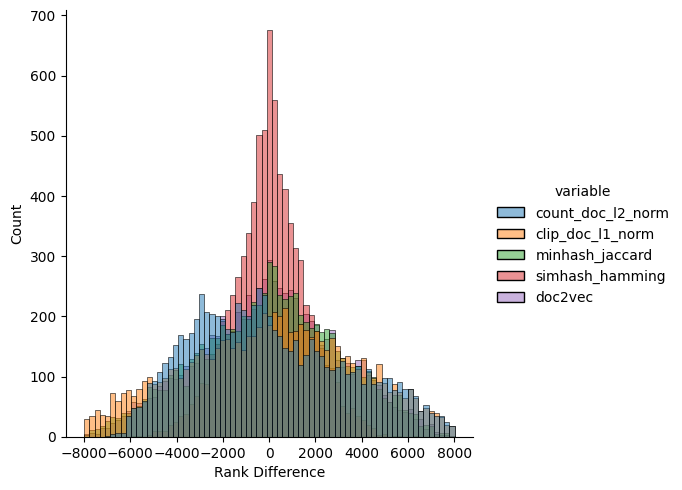

In [ ]:
plot_df = rank_diff_df.drop(columns=['doc_num']).melt().rename(columns={'value':'Rank Difference','variable':'Approach'})
sns.displot(plot_df, x='Rank Difference', hue='Approach')

In [ ]:
var_rank_diff = rank_diff_df.drop(columns=['doc_num','tfidf_doc_cosine']).var(axis=0)
var_rank_diff = var_rank_diff.reset_index().rename(columns={'index':'metric',0:'variance'})
var_rank_diff = var_rank_diff.sort_values(by=['variance'],ascending=True)
var_rank_diff

,metric,variance
3,simhash_hamming,2.538154e+06
4,doc2vec,8.845181e+06
2,minhash_jaccard,9.275360e+06
0,count_doc_l2_norm,1.094450e+07
1,clip_doc_l1_norm,1.299531e+07


# Association Analysis

In [25]:
from association_analysis import *

In [26]:
# Input, can be word that is not in feature but in model
target_word_list = ['vaccine', 'pandemic', 'respiratory']

In [27]:
if len(target_word_list) > 0:
    token_list = list(count_vectorizer.get_feature_names_out())
    index_dict = get_target_document_index(X_count,token_list,target_word_list)
    interested_list = list()
    for key in index_dict:
        interested_list += index_dict[key]
    print('Number of interested document: ',len(interested_list))
    df = df.iloc[interested_list]

Using Model: glove-wiki-gigaword-100

Token not in model: 8/4096 (0.2%)
Comparing target word 0/3: vaccine
Comparing target word 1/3: pandemic
Comparing target word 2/3: respiratory
300


## Association Rule (LDA)

In [32]:
import gensim.corpora as corpora
import pyLDAvis.gensim_models
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
import pyLDAvis

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pywong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
# Set number of topics
num_topics = 4

In [33]:
# Create Dictionary
id2word = corpora.Dictionary(df['all_text_list'])
# Create Corpus
texts = df['all_text_list']
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Build LDA model
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=42, passes=10, alpha='auto', per_word_topics=True)
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['all_text_list'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)


Coherence Score:  0.2916362356807569


## Wordcloud

In [34]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

In [35]:
# Prepare Wordcloud of Top N words in each topic

cols = [color for name, color in mcolors.XKCD_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(
    width=4000,
    height=2000,
    max_words=10,
    prefer_horizontal=1.0,
    background_color='whitesmoke'
)

topics = lda_model.show_topics(formatted=False)
# Print the keywords for each topic
print(lda_model.print_topics())
print(lda_model.top_topics)

[(0, '0.006*"model" + 0.006*"data" + 0.005*"based" + 0.005*"results" + 0.004*"research" + 0.004*"different" + 0.004*"career" + 0.004*"models" + 0.003*"expenditure" + 0.003*"information"'), (1, '0.005*"study" + 0.004*"health" + 0.004*"research" + 0.004*"participants" + 0.003*"geographic" + 0.003*"different" + 0.003*"model" + 0.003*"patients" + 0.003*"simulation" + 0.003*"government"'), (2, '0.007*"data" + 0.004*"work" + 0.004*"values" + 0.004*"students" + 0.004*"time" + 0.003*"learning" + 0.003*"study" + 0.003*"different" + 0.003*"results" + 0.003*"model"'), (3, '0.005*"time" + 0.005*"data" + 0.005*"efficiency" + 0.004*"model" + 0.004*"cost" + 0.004*"different" + 0.004*"magnetic" + 0.004*"based" + 0.003*"costs" + 0.003*"results"')]
<bound method LdaModel.top_topics of <gensim.models.ldamodel.LdaModel object at 0x000002335E19BC50>>


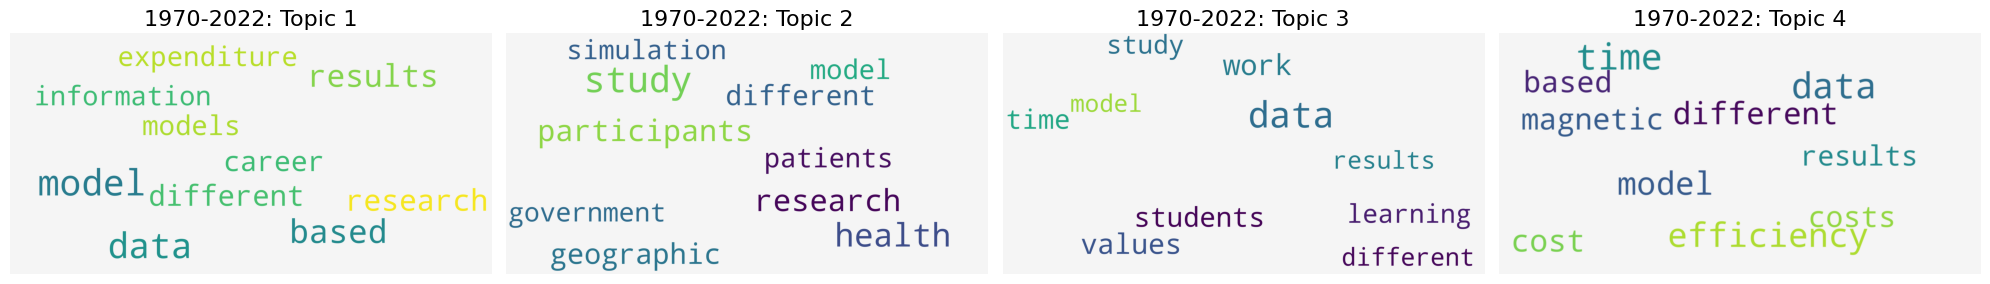

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.030424 -0.029196       1        1  26.691730
0     -0.092516 -0.068273       2        1  26.055175
1      0.103864 -0.009316       3        1  25.959022
3     -0.041772  0.106785       4        1  21.294074, topic_info=             Term        Freq        Total Category  logprob  loglift
4463       career  719.000000   719.000000  Default  30.0000  30.0000
1875  expenditure  665.000000   665.000000  Default  29.0000  29.0000
5727     magnetic  564.000000   564.000000  Default  28.0000  28.0000
234    efficiency  872.000000   872.000000  Default  27.0000  27.0000
327    geographic  676.000000   676.000000  Default  26.0000  26.0000
...           ...         ...          ...      ...      ...      ...
756         study  436.161521  2641.992416   Topic4  -5.8718  -0.2545
654      research  409.762978  2383.474415   Topic4  -5.9342  -0.2140
233       effects  301.293603   946.997412   Topic4  -6.2417   0.4015
771        system  311.162829  1441.172448   Topic4  -6.2095   0.0138
1378        table  298.580882  1331.013384   Topic4  -6.2508   0.0521

[349 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
18027      1  0.007727     abortion
18027      3  0.988998     abortion
18027      4  0.007727     abortion
2552       1  0.017378    accepting
2552       2  0.040549    accepting
...      ...       ...          ...
835        4  0.107805         work
13881      1  0.986571  worldmaking
13881      2  0.014725  worldmaking
12824      1  0.976742       worlds
12824      2  0.013199       worlds

[838 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 4])

In [36]:
fig, axes = plt.subplots(1, num_topics, figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    
    plt.gca().imshow(cloud)
    plt.gca().set_title(str(start_year) + '-' + str(end_year) + ': Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.imshow(cloud, interpolation='bilinear')
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
vis

## Prepare for Association Mining 

In [37]:
min_support = 0.6
mine_col = 'all_text_list'

In [38]:
# Pre-processing
te = TransactionEncoder()
te_ary = te.fit (df[mine_col]).transform(df[mine_col])
df_processd_text = pd.DataFrame (te_ary, columns=te.columns_)
print(df_processd_text)

       aag  abandon  abandoned  abandoning  abandonment  abarca  abatement  \
0    False    False       True       False         True   False      False   
1    False    False      False       False        False   False      False   
2    False    False      False       False        False   False      False   
3    False    False      False       False        False   False      False   
4    False    False      False       False        False   False      False   
..     ...      ...        ...         ...          ...     ...        ...   
295  False    False      False       False        False   False      False   
296  False    False      False       False        False   False      False   
297  False    False      False       False        False   False      False   
298  False    False      False       False        False   False      False   
299  False    False      False       False        False   False      False   

     abbreviate  abbreviation  abbreviations  ...  zipper   zon

## Association Rule (FP Growth)

In [39]:
from mlxtend.frequent_patterns import fpgrowth

    support     itemsets
0  0.896667  (different)
1  0.860000      (based)
2  0.846667       (data)
3  0.840000      (study)
4  0.840000     (number)
              antecedents       consequents   support  confidence      lift
5748     (time, research)          (future)  0.620000    0.869159  1.207165
5749             (future)  (time, research)  0.620000    0.861111  1.207165
5043      (based, number)           (model)  0.600000    0.792952  1.195404
5046              (model)   (based, number)  0.600000    0.904523  1.195404
2903  (results, research)    (based, study)  0.600000    0.900000  1.194690
...                   ...               ...       ...         ...       ...
4528          (different)     (significant)  0.660000    0.736059  1.012926
4979                (non)       (different)  0.626667    0.908213  1.012876
4978          (different)             (non)  0.626667    0.698885  1.012876
1572           (analysis)       (important)  0.676667    0.838843  1.010654
1573          

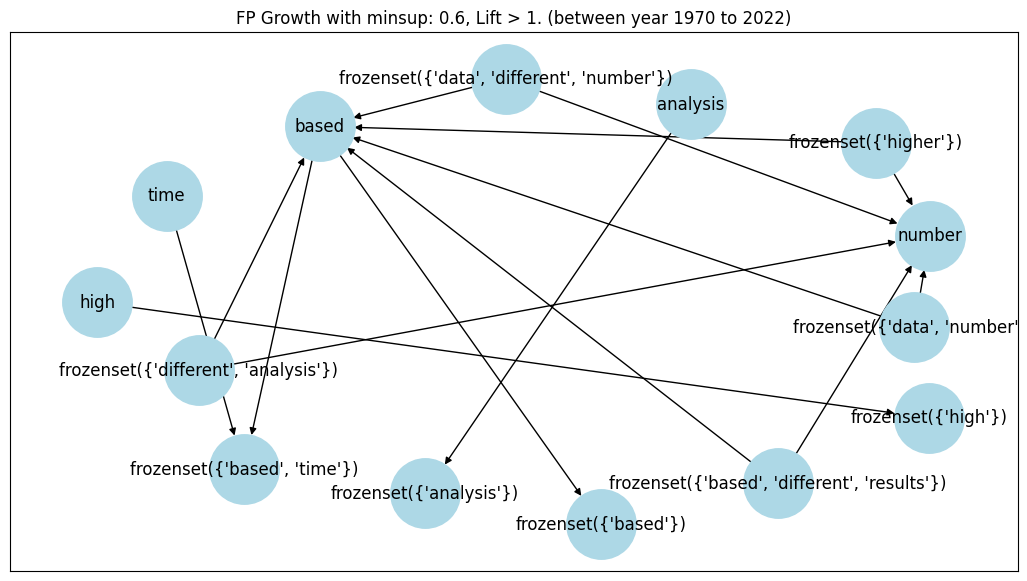

In [40]:
frq_items_fp = fpgrowth(df_processd_text, min_support=min_support, use_colnames=True)
print(frq_items_fp.head())
rules_fp = find_association_rules(frq_items_fp)
print(rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']]) 
if len(rules_fp) > 0:
    #draw_catgraph (rules_fp, 10, topics, 'FP Growth with minsup: ' + str(min_support) + ', Lift > 1. (between year ' + str(start_year) + ' to ' + str(end_year) + ')')
    draw_graph (rules_fp, 5, topics, 'FP Growth with minsup: ' + str(min_support) + ', Lift > 1. (between year ' + str(start_year) + ' to ' + str(end_year) + ')')

## Association Rule (Apriori Algorithm)

    support      itemsets
0  0.616667   (according)
1  0.650000    (addition)
2  0.806667    (analysis)
3  0.636667    (approach)
4  0.640000  (associated)
              antecedents       consequents   support  confidence      lift
2600     (time, research)          (future)  0.620000    0.869159  1.207165
2601             (future)  (time, research)  0.620000    0.861111  1.207165
1435      (based, number)           (model)  0.600000    0.792952  1.195404
1438              (model)   (based, number)  0.600000    0.904523  1.195404
4673  (results, research)    (based, study)  0.600000    0.900000  1.194690
...                   ...               ...       ...         ...       ...
272           (different)     (significant)  0.660000    0.736059  1.012926
245                 (non)       (different)  0.626667    0.908213  1.012876
244           (different)             (non)  0.626667    0.698885  1.012876
16             (analysis)       (important)  0.676667    0.838843  1.010654
17      

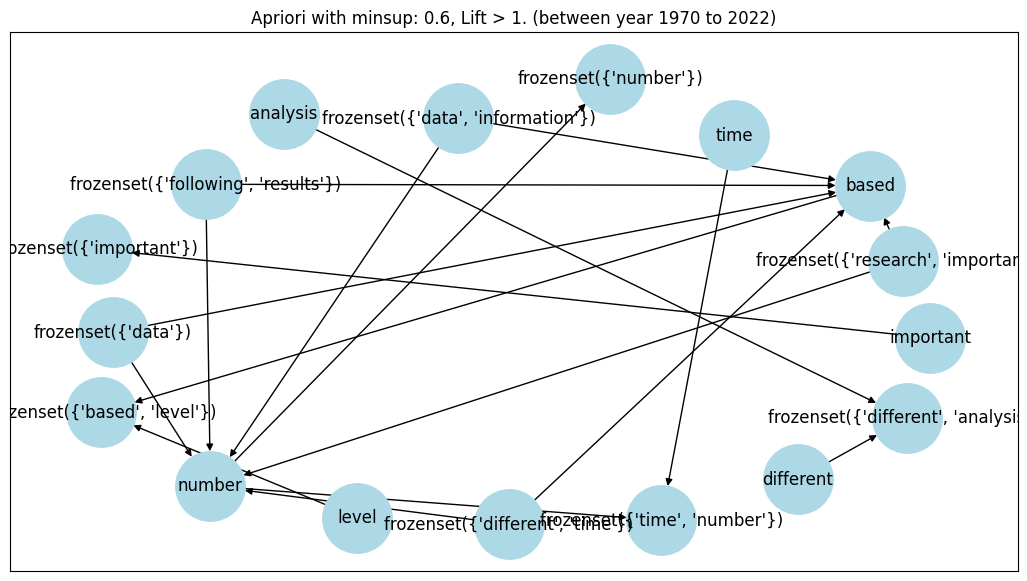

In [41]:
# Building the model 
frq_items_ap = apriori(df_processd_text, min_support = min_support, use_colnames = True) 
print(frq_items_ap.head())
rules_ap = find_association_rules(frq_items_ap)
print(rules_ap[['antecedents', 'consequents', 'support', 'confidence', 'lift']]) 
if len(rules_ap) > 0:
    #draw_catgraph (rules_ap, 10, topics, 'Apriori with minsup: ' + str(min_support) + ', Lift > 1. (between year ' + str(start_year) + ' to ' + str(end_year) + ')')
    draw_graph (rules_ap, 5, topics, 'Apriori with minsup: ' + str(min_support) + ', Lift > 1. (between year ' + str(start_year) + ' to ' + str(end_year) + ')')

# Clustering Analysis